# Gaussian Naive Bayes Classification of photometry

## Fig 9.3

In [2]:
"""
Gaussian Naive Bayes Classification of photometry
-------------------------------------------------
Figure 9.3

Gaussian naive Bayes classification method used to separate variable RR Lyrae
stars from nonvariable main sequence stars. In the left panel, the light gray
points show non- variable sources, while the dark points show variable sources.
The classification boundary is shown by the black line, and the classification
probability is shown by the shaded background. In the right panel, we show the
completeness and contamination as a function of the number of features used in
the fit. For the single feature, u - g is used. For two features, u - g and
g = r areused. For three features, u - g, g - r, and r- i are used. It is
evident that the g - r color is the best discriminator. With all four colors,
naive Bayes attains a completeness of 0.876 and a contamination of 0.790.
"""

'\nGaussian Naive Bayes Classification of photometry\n-------------------------------------------------\nFigure 9.3\n\nGaussian naive Bayes classification method used to separate variable RR Lyrae\nstars from nonvariable main sequence stars. In the left panel, the light gray\npoints show non- variable sources, while the dark points show variable sources.\nThe classification boundary is shown by the black line, and the classification\nprobability is shown by the shaded background. In the right panel, we show the\ncompleteness and contamination as a function of the number of features used in\nthe fit. For the single feature, u - g is used. For two features, u - g and\ng = r areused. For three features, u - g, g - r, and r- i are used. It is\nevident that the g - r color is the best discriminator. With all four colors,\nnaive Bayes attains a completeness of 0.876 and a contamination of 0.790.\n'

In [3]:
from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [5]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [7]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# get data and split into training & testing sets

In [8]:
#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

Text(0.5, 0, ' Y ')

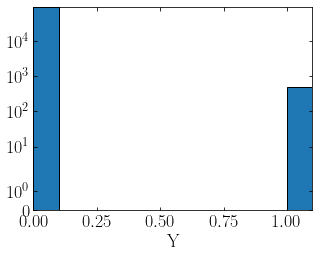

In [35]:
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.hist(y,bins=11,range=(0,1.1))
ax.set_yscale('symlog')
ax.set_xlabel(' Y ')

Text(0.5, 0, 'col 3')

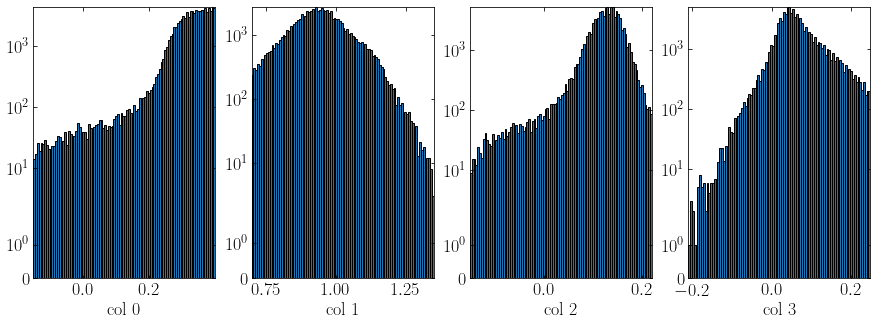

In [36]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(141)
ax.hist(X[:,0],bins=100)
ax.set_yscale('symlog')
ax.set_xlabel('col 0')
ax = fig.add_subplot(142)
ax.hist(X[:,1],bins=100)
ax.set_yscale('symlog')
ax.set_xlabel('col 1')
ax = fig.add_subplot(143)
ax.hist(X[:,2],bins=100)
ax.set_yscale('symlog')
ax.set_xlabel('col 2')
ax = fig.add_subplot(144)
ax.hist(X[:,3],bins=100)
ax.set_yscale('symlog')
ax.set_xlabel('col 3')

# perform Naive Bayes

In [37]:
np.arange(1, X.shape[1] + 1)

array([1, 2, 3, 4])

In [9]:
#----------------------------------------------------------------------
# perform Naive Bayes
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

order = np.array([1, 0, 2, 3])

for nc in Ncolors:
    clf = GaussianNB()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)


completeness [0.48175182 0.68613139 0.81021898 0.87591241]
contamination [0.85201794 0.79295154 0.80143113 0.79020979]


# Compute the decision boundary

In [39]:
#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)


In [ ]:
# ravel flatten an array

In [48]:
yy.ravel()

array([-0.15, -0.15, -0.15, ...,  0.4 ,  0.4 ,  0.4 ])

In [ ]:
# np.c_ concatenate slices

In [46]:
np.c_[yy.ravel(), xx.ravel()]

array([[-0.15    ,  0.7     ],
       [-0.15    ,  0.708125],
       [-0.15    ,  0.71625 ],
       ...,
       [ 0.4     ,  1.33375 ],
       [ 0.4     ,  1.341875],
       [ 0.4     ,  1.35    ]])

In [50]:
# flatten list of 2D point
np.c_[yy.ravel(), xx.ravel()].shape

(5751, 2)

In [47]:
Z.shape

(71, 81)

# plot the results

In [43]:
all_colors =np.where(y,"r","b")

In [44]:
N_plot

5483

In [51]:
xlim

(0.7, 1.35)

In [52]:
ylim

(-0.15, 0.4)

In [53]:
xlim + ylim 

(0.7, 1.35, -0.15, 0.4)

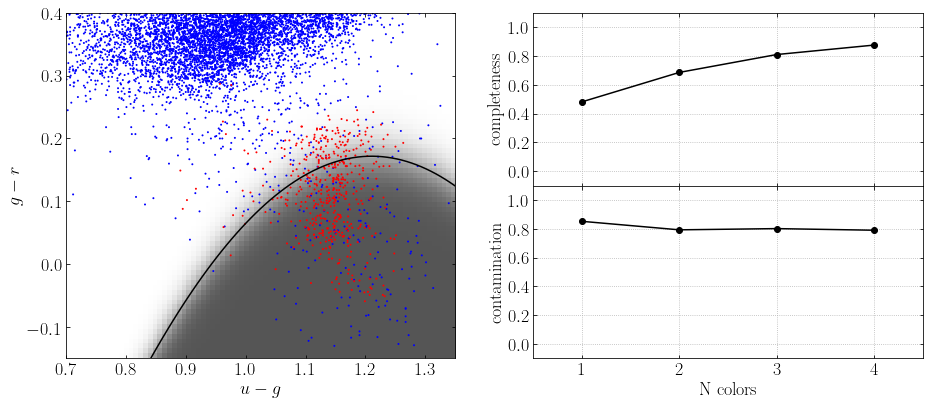

In [45]:
#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
#im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
#                s=4, lw=0, cmap=plt.cm.binary, zorder=2)

im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=all_colors[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)

im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# Plot completeness vs Ncolors
ax = plt.subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# Plot contamination vs Ncolors
ax = plt.subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()
